<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Javier Brito</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como:
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Ruta del archivo WAV en Google Drive
file_path = '/content/drive/My Drive/Baracuda_1977.wav'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
import numpy as np
import torch
from scipy.stats import kurtosis
from scipy.stats import skew

## Comando para cargar archivo sin google colab:
## file_path = "Nombre_Del_Audio.wav"


audio, sr = librosa.load(file_path, sr=None, duration=15)
## Se cargan los archivos, donde el comando posee la siguiente sintaxis:
## audio, sr = librosa.load("ruta_del_archivo_wav",sr=(sample),duration=15)
## Donde sample corresponde a la tasa de sampleo.
## y duration corresponde a la duracion del audio.

##-----------------Calculo de parametros----------------------------------------
media = np.mean(audio)          ##
kurtosis_value = kurtosis(audio)##
skewness = skew(audio)          ##
zero_crossing_rate = np.sum(librosa.zero_crossings(audio))/len(audio)
spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sr))
energia = np.sum(audio**2)/len(audio)
rmse = np.sqrt(np.mean(librosa.feature.rms(y=audio)))
frecuencia_fundamental = librosa.pitch_tuning(audio)
##--------------------------------------------------------------------------------


##------------------------------Valores obtenidos----------------------------------
print("Media:", media)
print("Kurtosis:", kurtosis_value)
print("Skewness:", skewness)
print("Zero Crossing Rate:", zero_crossing_rate)
print("Spectral Centroid:", spectral_centroid)
print("Energía:", energia)
print("RMSE:", rmse)
print("Frecuencia fundamental:", frecuencia_fundamental)

Media: -0.0005858133
Kurtosis: 0.51456372247553
Skewness: 0.016617133758259576
Zero Crossing Rate: 0.035369614512471656
Spectral Centroid: 1122.3289413403284
Energía: 0.007761010133219955
RMSE: 0.28773418
Frecuencia fundamental: 0.48


### 1.1 Descripción de variables:
* Media: Es el promedio de todas las muestras en amplitud, indica el volumen promedio del audio

* Kurtosis: Mide la forma de la distribucion de las amplitudes de una señal en el dominio  temporal.

* Skewness: Mide la simetría de la distribución de los datos, un valor positivo significa que hay mas valores por encima dee la media que por debajo de ella.

* Zero Crossing Rate: Esta medida se utiliza para medir cuantas veces la señal cruza por el cero en un periodo de tiempo.

* Spectral Centroid: Indica el centro de masa espectral del audio, corresponderia a la frecuencia promedio ponderada de las amplitudes medidas.

* Energía: Corresponde a la cantidad total de energia en la señal de audio, esto indica que tan intenso sera el sonido a escuchar en una determinada sección del tiempo.

* RMSE(Root Mean Square Error): Es una medida que indica la potencia promedio de una señal. Se utiliza en algunos contextos para evaluar la calidad de la señal del audio.

* Frecuencia fundamental: Corresponde a la frecuencia mas baja en la señal estudiada, dependiendo de la variacion de este parametro la señal de audio podria comprometer su timbre y tono original.

## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512.


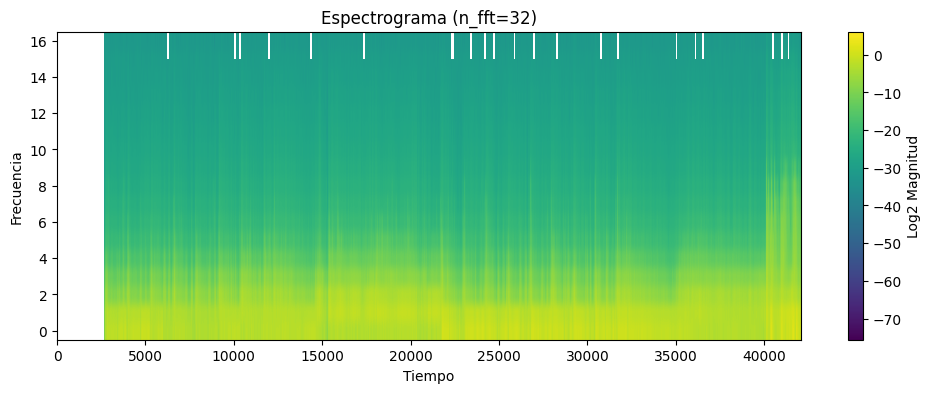

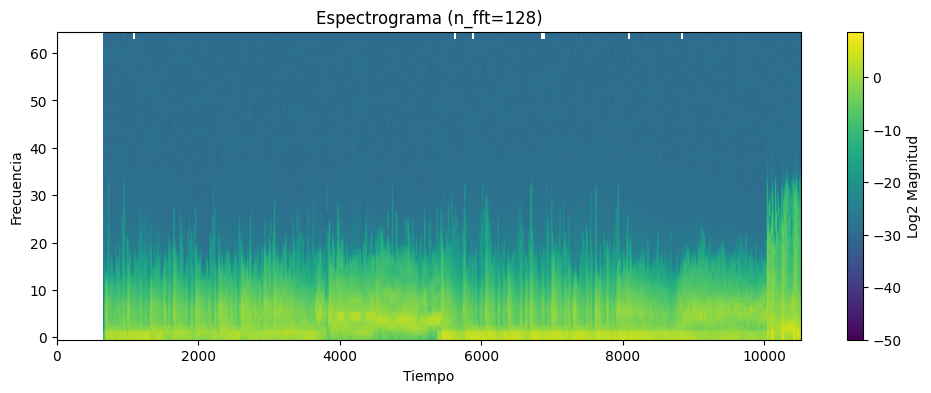

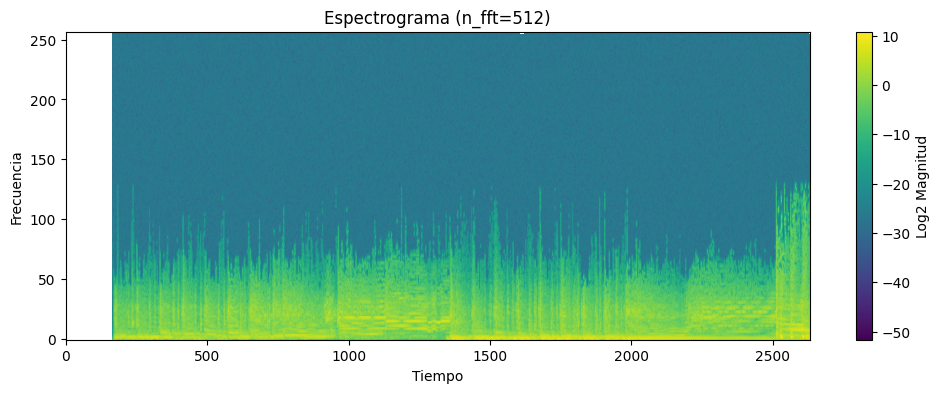

In [ ]:
import torch
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt


waveform, sample_rate = torchaudio.load(file_path)

##-----------------Obtencion distintas transformadas de Fourier--------------------
spectrogram_32 = T.Spectrogram(n_fft=32)(waveform)  ## T.F. con n°32
spectrogram_128 = T.Spectrogram(n_fft=128)(waveform)## T.F. con n°128
spectrogram_512 = T.Spectrogram(n_fft=512)(waveform)## T.F. con n°512
##----------------------------------------------------------------------------------

##-----------------Funcion que muestra los espectrogramas---------------------------
def plot_spectrogram(spectrogram, title):
    plt.figure(figsize=(12, 4))
    plt.imshow(spectrogram.log2()[0].detach().numpy(), cmap='viridis', origin='lower', aspect='auto')
    plt.xlabel('Tiempo')
    plt.ylabel('Frecuencia')
    plt.title(title)
    plt.colorbar(label='Log2 Magnitud')
    plt.show()
##-----------------Llaama a la funcion para obtener los espectrogramas------------------------------------
plot_spectrogram(spectrogram_32, 'Espectrograma (n_fft=32)')
plot_spectrogram(spectrogram_128, 'Espectrograma (n_fft=128)')
plot_spectrogram(spectrogram_512, 'Espectrograma (n_fft=512)')

### 2.2 Utilizando Pytorch audio y Librosa, implementa Mel Frequency Cepstral Coefficients (MFCCs) (opcional)

Sigue el siguiente ejemplo (https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial) y explica que significa el resultado obtenido, graficando los coeficientes en un espectrograma. Investiga sobre Cepstral Analysis.


In [ ]:
# Calcular MFCCs
mfcc_transform = T.MFCC(sample_rate=sample_rate, n_mfcc=13)
mfcc = mfcc_transform(waveform)

# Ver los coeficientes MFCC resultantes
print("MFCC shape:", mfcc.shape)

MFCC shape: torch.Size([2, 13, 3367])


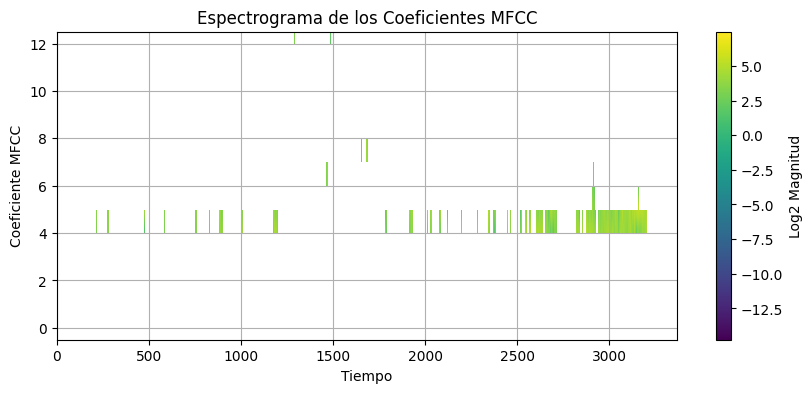

In [ ]:
import matplotlib.pyplot as plt

# Visualizar los coeficientes MFCC como un espectrograma
plt.figure(figsize=(10, 4))
plt.imshow(mfcc.log2()[0].detach().numpy(), cmap='viridis', origin='lower', aspect='auto')
plt.xlabel('Tiempo')
plt.ylabel('Coeficiente MFCC')
plt.title('Espectrograma de los Coeficientes MFCC')
plt.colorbar(label='Log2 Magnitud')
plt.grid(True)
plt.show()

### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado.

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

//Inf en Github

## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html
